In [13]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='notebook')
from matplotlib import pyplot as plt
from figures.plotting import annotate_corr_grid

benchmark = 'bonner.Object2Vec.pls.roi=LOC'
intrinsic_metric = 'intra-ID'
pooling_enc = False
dataset_intrinsic = 'imagenet'
pooling_intrinsic = True

data = pd.merge(pd.read_csv(f'../results/encoding|benchmark:{benchmark}|pooling:{pooling_enc}.csv'),
                pd.read_csv(f'../results/intrinsic-dim|dataset:{dataset_intrinsic}|pooling:{pooling_intrinsic}.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])
metric_columns = ['ID', 'inter-ID', 'intra-ID']
metric_stds = [c for c in data.columns if '(std)' in c]
data = data.drop(columns=metric_stds)

tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data = data.melt(id_vars=[c for c in data.columns if c not in metric_columns], 
                 value_vars=metric_columns, var_name='metric', value_name='metric_value')

data.head()

,layer,score,score_error,architecture,task,kind,source,metric,metric_value
0,layer1.0.relu,0.248093,0.007623,ResNet18,None,Untrained,PyTorch,ID,20.777234
1,layer1.1.relu,0.257415,0.006728,ResNet18,None,Untrained,PyTorch,ID,20.466073
2,layer2.0.relu,0.322613,0.006367,ResNet18,None,Untrained,PyTorch,ID,24.808229
3,layer2.1.relu,0.257645,0.007245,ResNet18,None,Untrained,PyTorch,ID,22.909127
4,layer3.0.relu,0.315366,0.009026,ResNet18,None,Untrained,PyTorch,ID,28.781188


---
# All models and layers

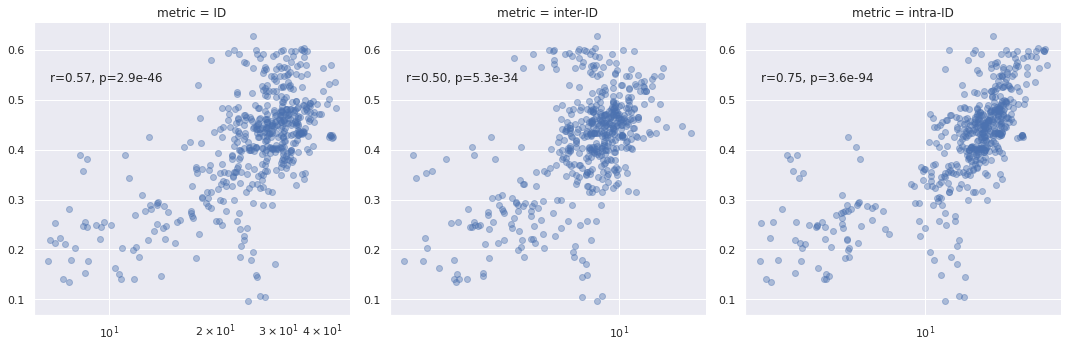

In [7]:
g = sns.lmplot(data=data, x='metric_value', y='score', col='metric', col_wrap=3,
               scatter_kws={'alpha':0.4}, sharex=False, sharey=False, height=5, fit_reg=False)
for ax in g.axes.flatten():
    ax.set_xscale('log')
annotate_corr_grid(g, x='metric_value', y='score')
plt.show()

---
# ResNet 18

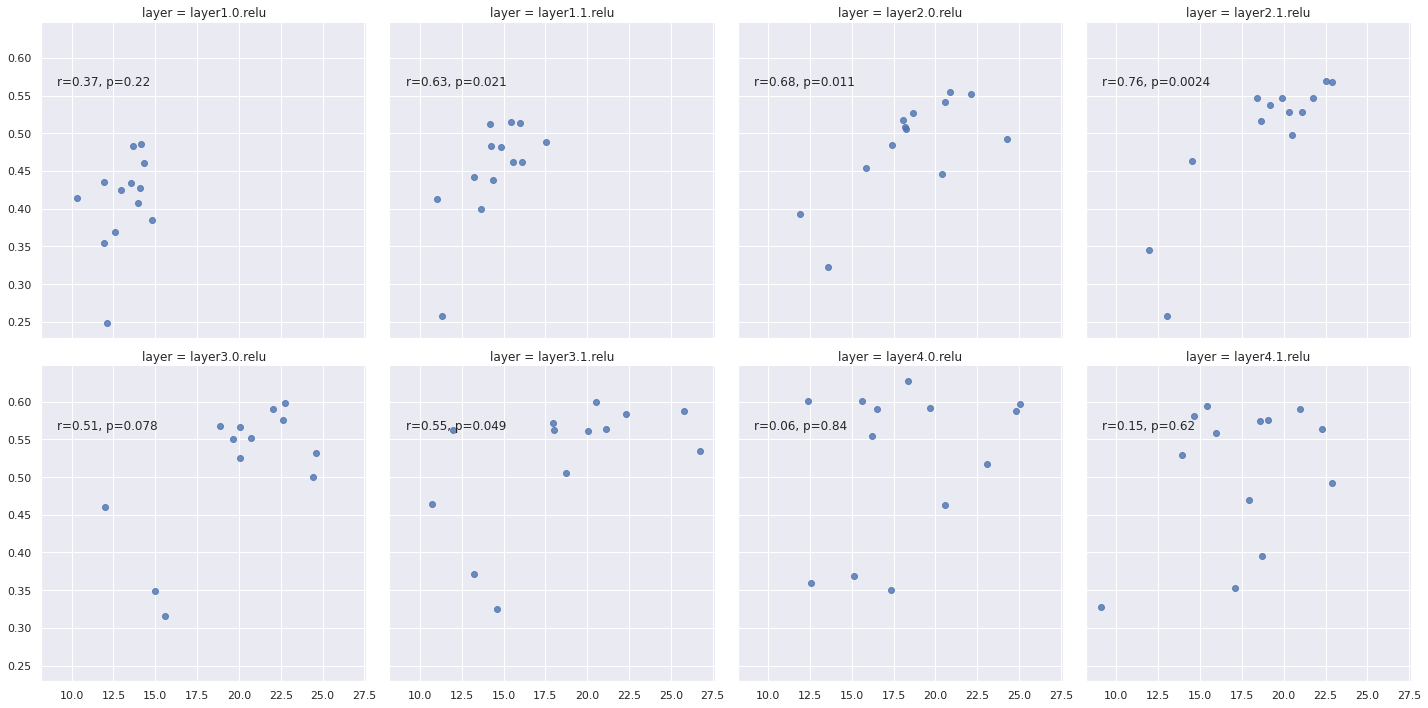

In [14]:
results = data[(data.architecture == 'ResNet18') & (data.metric == intrinsic_metric)]
g = sns.lmplot(data=results, x='metric_value', y='score', col='layer', col_wrap=4,
               sharex=True, sharey=True, height=5, fit_reg=False)
annotate_corr_grid(g, x='metric_value', y='score')
plt.show()

---
# Taskonomy (ResNet 50)

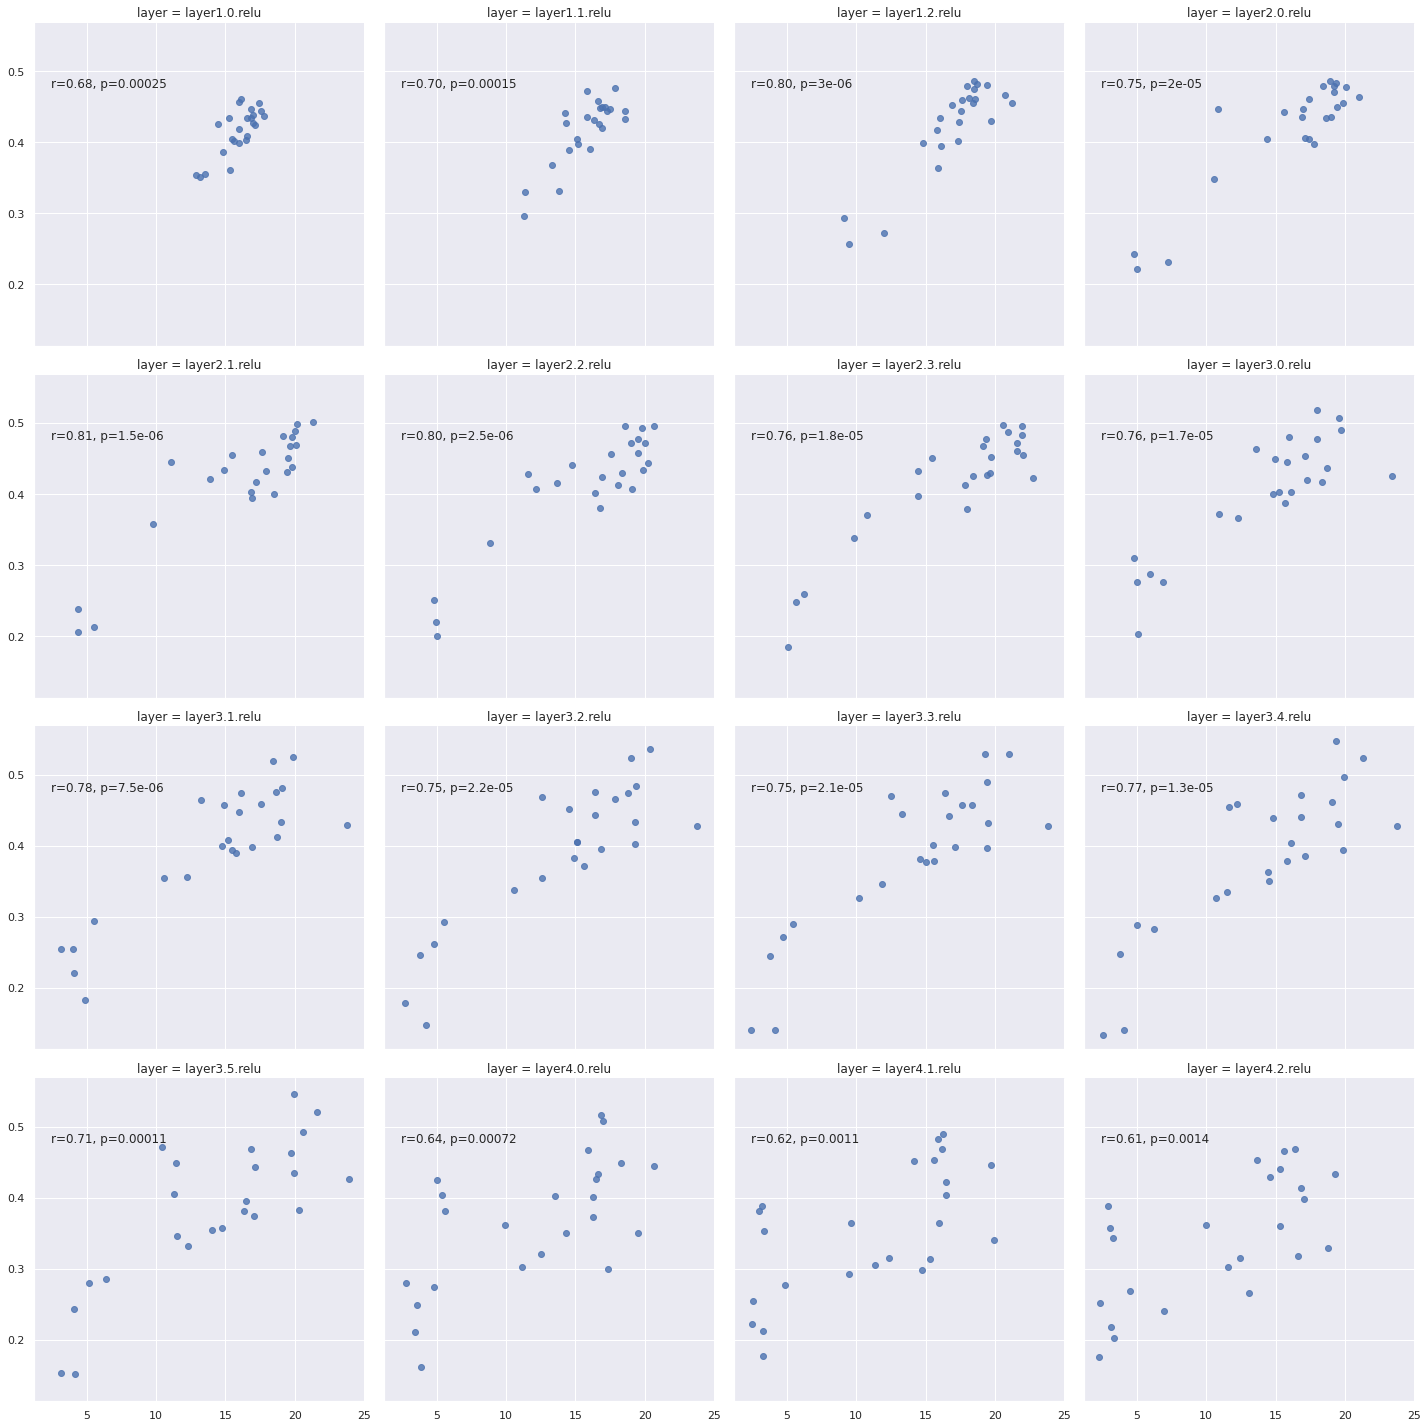

In [15]:
results = data[(data.source == 'Taskonomy') & (data.metric == intrinsic_metric)]
g = sns.lmplot(data=results, x='metric_value', y='score', col='layer', col_wrap=4,
               sharex=True, sharey=True, height=5, fit_reg=False)
annotate_corr_grid(g, x='metric_value', y='score')
plt.show()